In [1]:
import pandas as pd

df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/'
                      'machine-learning-databases/wine/wine.data',
                      header=None)

df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash',
                   'Alcalinity of ash', 'Magnesium', 'Total phenols',
                   'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
                   'Color intensity', 'Hue', 'OD280/OD315 of diluted wines',
                   'Proline']

# UCI 머신 러닝 저장소에서 Wine 데이터셋을 다운로드할 수 없을 때
# 다음 주석을 해제하고 로컬 경로에서 데이터셋을 적재하세요:

# df_wine = pd.read_csv('wine.data', header=None)

# 클래스 1 제외
df_wine = df_wine[df_wine['Class label'] != 1]

y = df_wine['Class label'].values
X = df_wine[['Alcohol', 'OD280/OD315 of diluted wines']].values

In [2]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split


le = LabelEncoder()
y = le.fit_transform(y)

X_train, X_test, y_train, y_test =\
            train_test_split(X, y, 
                             test_size=0.2, 
                             random_state=1,
                             stratify=y)

In [4]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

tree = DecisionTreeClassifier(criterion='entropy', 
                              max_depth=None,
                              random_state=1)

bag = BaggingClassifier(base_estimator=tree,
                        n_estimators=500, 
                        max_samples=1.0, 
                        max_features=1.0, 
                        bootstrap=True, 
                        bootstrap_features=False, 
                        n_jobs=1, 
                        random_state=1)

In [5]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score


tree = DecisionTreeClassifier(criterion='entropy', random_state=1, max_depth=1)

ada=AdaBoostClassifier(base_estimator=tree,n_estimators=500, learning_rate=0.1, random_state=1)
tree=tree.fit(X_train, y_train)

y_train_pred = tree.predict(X_train)
y_test_pred = tree.predict(X_test)
tree_train = accuracy_score(y_train, y_train_pred)
tree_test = accuracy_score(y_test, y_test_pred)

print('결정 트리의 훈련 정확도/테스트 정확도 %.3f/%.3f' % (tree_train, tree_test))


결정 트리의 훈련 정확도/테스트 정확도 0.916/0.875


In [7]:
# adaboost #

ada=ada.fit(X_train, y_train)
y_train_pred = ada.predict(X_train)
y_test_pred = ada.predict(X_test)
ada_train = accuracy_score(y_train, y_train_pred)
ada_test = accuracy_score(y_test, y_test_pred)
print('에이다부스트의 훈련 정확도/테스트 정확도 %.3f/%.3f' % (ada_train, ada_test))


에이다부스트의 훈련 정확도/테스트 정확도 1.000/0.917


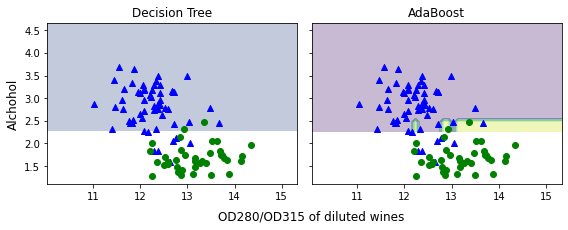

In [10]:
# 결정 영역 비교#

import numpy as np
import matplotlib.pyplot as plt

x_min = X_train[:,0].min()-1
x_max = X_train[:,0].max()+1
y_min = X_train[:,1].min()+1
y_max=X_train[:,1].max()+1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))


f, axarr = plt.subplots(1,2,
                        sharex='col',
                        sharey='row',
                        figsize=(8,3))

for idx, clf, tt in zip([0,1], [tree, ada], ['Decision Tree', 'AdaBoost']):
  clf.fit(X_train, y_train)
  Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)
  axarr[idx].contourf(xx, yy, Z, alpha=0.3)
  axarr[idx].scatter(X_train[y_train==0, 0],
                     X_train[y_train==0, 1],
                     c='blue',
                     marker='^')
  axarr[idx].scatter(X_train[y_train==1, 0],
                     X_train[y_train==1, 1],
                     c='green',
                     marker='o')
  axarr[idx].set_title(tt)

axarr[0].set_ylabel('Alchohol', fontsize=12)
plt.tight_layout()
plt.text(0, -0.2,
         s='OD280/OD315 of diluted wines',
         ha='center',
         va='center',
         fontsize=12, transform=axarr[1].transAxes)

plt.show()


# 그래디언트 부스팅

In [12]:
from sklearn.ensemble import GradientBoostingClassifier
gbrt = GradientBoostingClassifier(n_estimators=20, random_state=42)
gbrt.fit(X_train, y_train)
gbrt_train_score = gbrt.score(X_train, y_train)
gbrt_test_score = gbrt.score(X_test, y_test)
print('그래디언트 부스팅의 훈련 정확도 / 테스트 정확도 %.3f/%.3f' % (gbrt_train_score, gbrt_test_score))


그래디언트 부스팅의 훈련 정확도 / 테스트 정확도 1.000/0.917


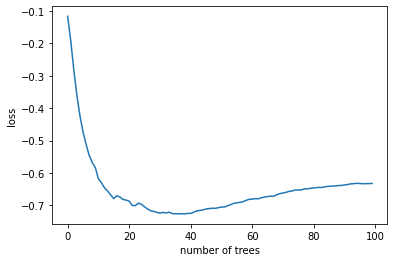

In [14]:
# 확률적 그래디언트 부스팅

gbrt = GradientBoostingClassifier(n_estimators=100, subsample=0.5, random_state=1)
gbrt.fit(X_train, y_train)
oob_loss = np.cumsum(-gbrt.oob_improvement_)
plt.plot(range(100), oob_loss)
plt.xlabel('number of trees')
plt.ylabel('loss')
plt.show()

In [15]:
#히스토그램 기반 부스팅 #
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier

hgbc = HistGradientBoostingClassifier(random_state=1)
hgbc.fit(X_train, y_train)

hgbc_train_score = gbrt.score(X_train, y_train)
hgbc_test_score = gbrt.score(X_test, y_test)
print('그레이디언트 부스팅 훈련 정확도/테스트 정확도 %.3f/%.3f' % (hgbc_train_score, hgbc_test_score))

그레이디언트 부스팅 훈련 정확도/테스트 정확도 1.000/0.917


/usr/local/lib/python3.8/dist-packages/sklearn/experimental/enable_hist_gradient_boosting.py:16: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  warnings.warn(


In [19]:
# XGBoost #

from xgboost import XGBClassifier
xgb = XGBClassifier(tree_method='hist', random_state=1)
xgb.fit(X_train, y_train)

xgb_train_score = xgb.score(X_train, y_train)
xgb_test_score = xgb.score(X_test, y_test)

print('XGBoost 훈련 정확도 / 테스트 정확도 %.3f/%.3f' % (xgb_train_score, xgb_test_score))
                            

XGBoost 훈련 정확도 / 테스트 정확도 0.968/0.917


In [20]:
# LightGBM #
from lightgbm import LGBMClassifier
lgb = LGBMClassifier(random_state=1)
lgb.fit(X_train, y_train)

lgb_train_score = lgb.score(X_train, y_train)
lgb_test_score = lgb.score(X_test, y_test)

print('LightGBM 훈련 정확도 / 테스트 정확도 %.3f/%.3f' % (lgb_train_score, lgb_test_score))

LightGBM 훈련 정확도 / 테스트 정확도 0.968/0.917
